In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
bank=pd.read_csv("bank_churn.csv")

In [5]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
bank.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
y=bank['Exited'] # Extracting dependent variable

# understand the features

In [9]:
bank.isnull().sum() # checking missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
num_variable=bank[['Age','CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']]
num_variable.describe() # statistical summary of numerical variables

,Age,CreditScore,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.921800,650.528800,5.012800,76485.889288,1.530200,100090.239881
std,10.487806,96.653299,2.892174,62397.405202,0.581654,57510.492818
min,18.000000,350.000000,0.000000,0.000000,1.000000,11.580000
25%,32.000000,584.000000,3.000000,0.000000,1.000000,51002.110000
50%,37.000000,652.000000,5.000000,97198.540000,1.000000,100193.915000
75%,44.000000,718.000000,7.000000,127644.240000,2.000000,149388.247500
max,92.000000,850.000000,10.000000,250898.090000,4.000000,199992.480000


# Understand the differences in characteristics between customers who exited and those who did not

Text(0.5, 1.0, 'EstimatedSalary vs Exited')

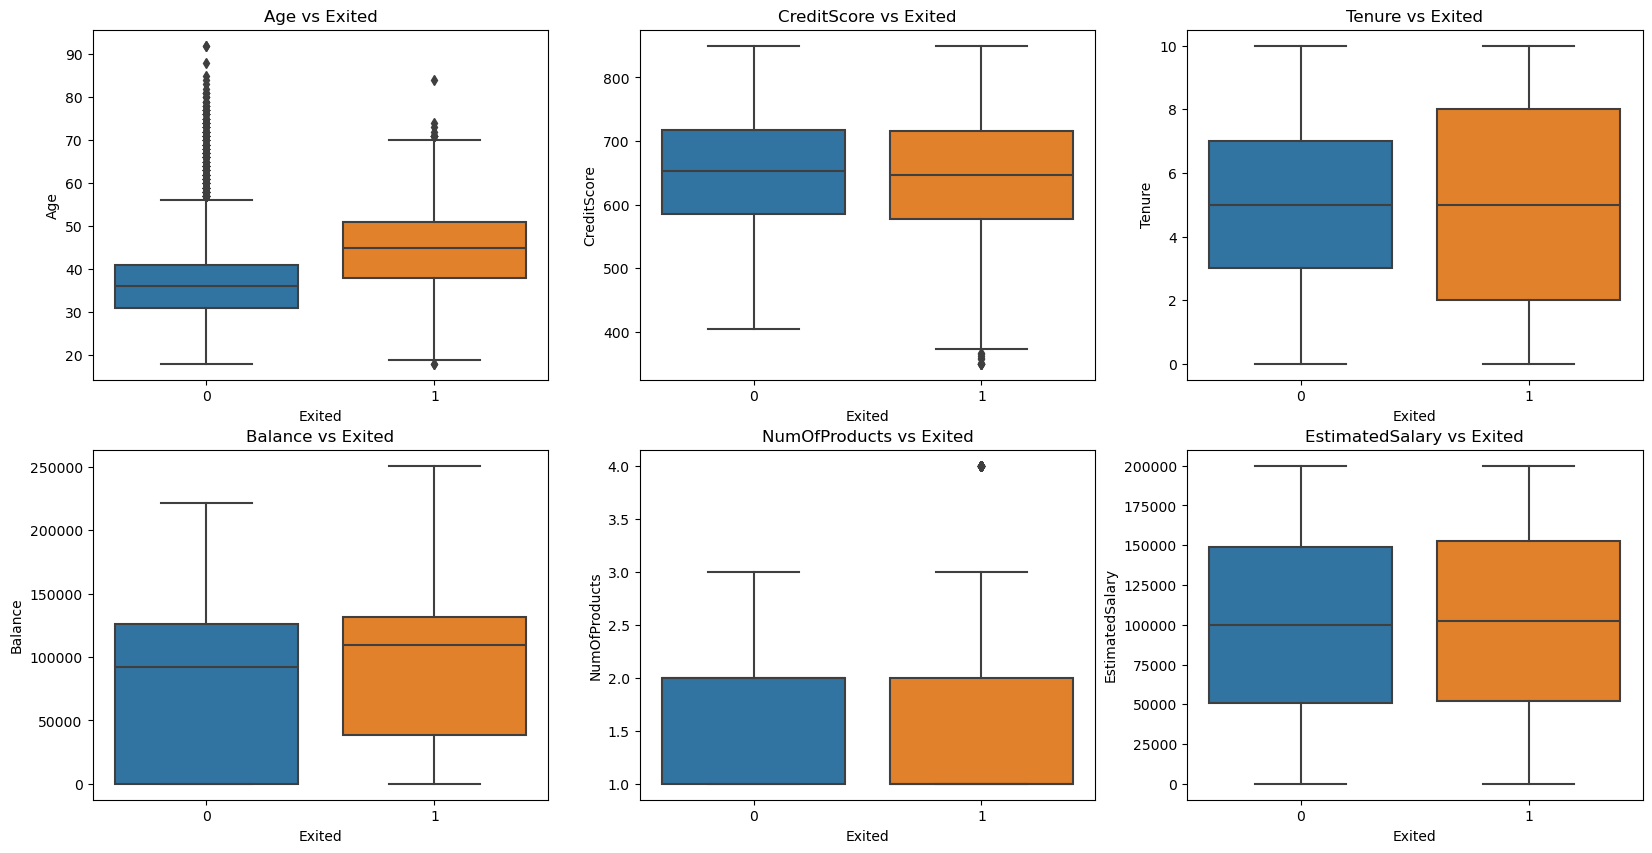

In [12]:
import matplotlib.pyplot as plt
fig,axss=plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited',y='Age',data=bank,ax=axss[0][0]).set_title('Age vs Exited')
sns.boxplot(x='Exited',y='CreditScore',data=bank,ax=axss[0][1]).set_title('CreditScore vs Exited')
sns.boxplot(x='Exited',y='Tenure',data=bank,ax=axss[0][2]).set_title('Tenure vs Exited')
sns.boxplot(x='Exited',y='Balance',data=bank,ax=axss[1][0]).set_title('Balance vs Exited')
sns.boxplot(x='Exited',y='NumOfProducts',data=bank,ax=axss[1][1]).set_title('NumOfProducts vs Exited')
sns.boxplot(x='Exited',y='EstimatedSalary',data=bank,ax=axss[1][2]).set_title('EstimatedSalary vs Exited')

Text(0.5, 1.0, 'WhetherActiveMember vs Exited')

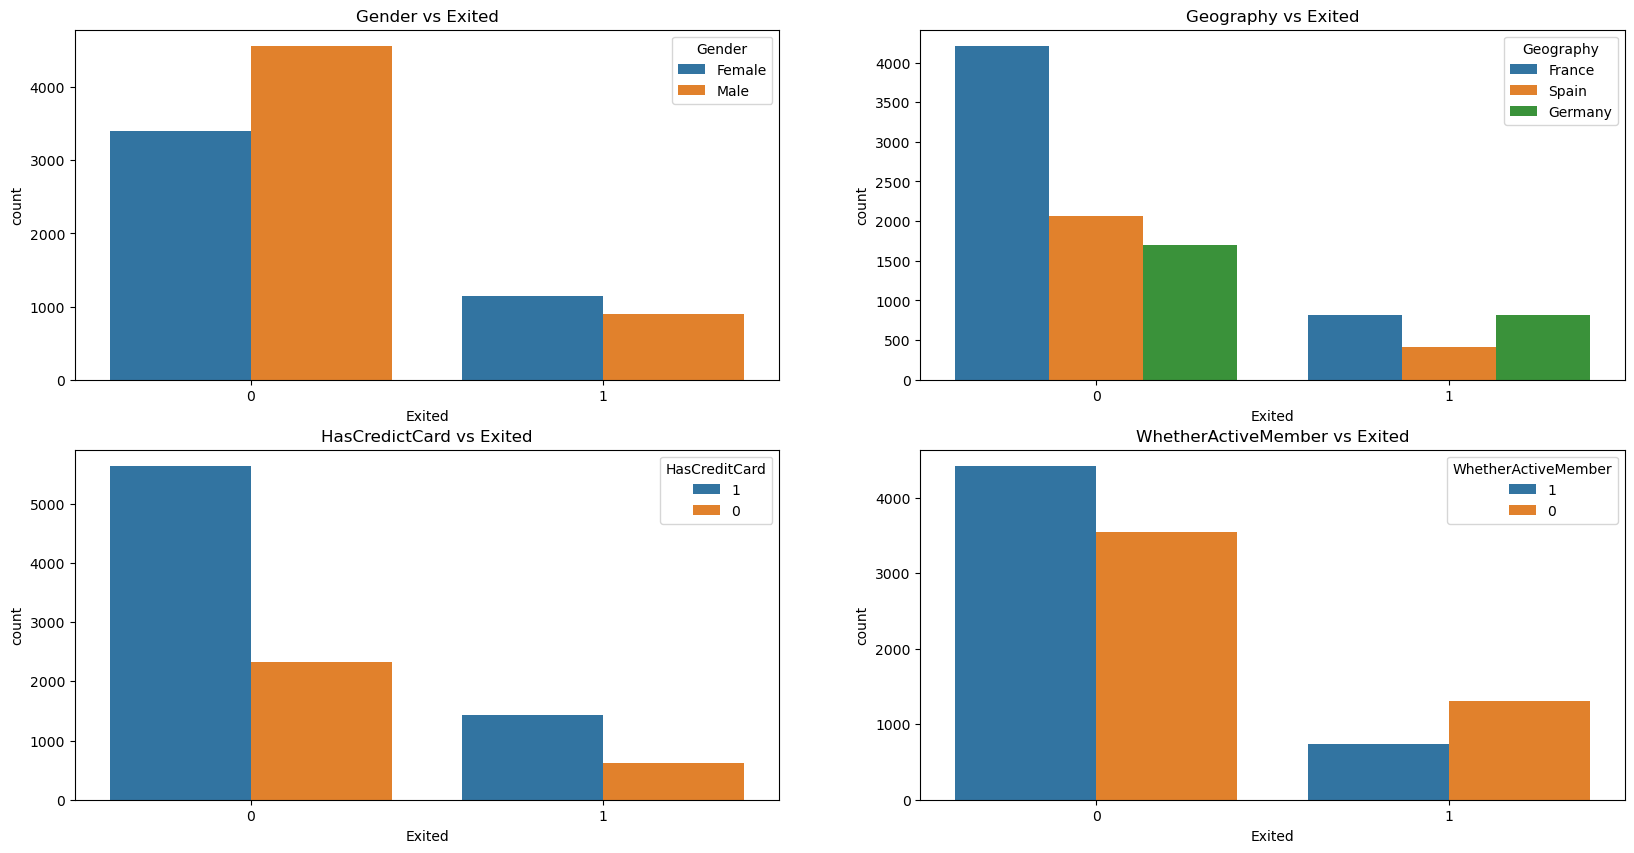

In [24]:
fig,axss=plt.subplots(2,2, figsize=[20,10])
bank['HasCreditCard']=bank['HasCrCard'].astype(str)
bank['WhetherActiveMember']=bank['IsActiveMember'].astype(str)
sns.countplot(x='Exited',hue='Gender',data=bank,ax=axss[0][0]).set_title('Gender vs Exited')
sns.countplot(x='Exited',hue='Geography',data=bank,ax=axss[0][1]).set_title('Geography vs Exited')
sns.countplot(x='Exited',hue='HasCreditCard',data=bank,ax=axss[1][0]).set_title('HasCredictCard vs Exited')
sns.countplot(x='Exited',hue='WhetherActiveMember',data=bank,ax=axss[1][1]).set_title('WhetherActiveMember vs Exited')

# Feature processing
remove the useless columns 

In [30]:
final=bank.drop(['RowNumber','CustomerId','Surname','Exited','HasCreditCard','WhetherActiveMember'],axis= 1)
final.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [31]:
final.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [32]:
#Divide variables into numeric and categorical types
cat_variable=final.columns[final.dtypes=="object"]
num_variable=final.columns[(final.dtypes=="int64") | (final.dtypes=="float64")]

In [33]:
cat_variable

Index(['Geography', 'Gender'], dtype='object')

In [34]:
num_variable

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [35]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(final,y,test_size=0.25,stratify=y)
print('training data has ' + str(x_train.shape[0]) + ' observation with ' + str(x_train.shape[1]) + ' features')
print('test data has ' + str(x_test.shape[0]) + ' observation with ' + str(x_test.shape[1]) + ' features')

training data has 7500 observation with 10 features
test data has 2500 observation with 10 features


In [36]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7290,536,France,Male,39,4,0.00,2,1,0,27150.35
8518,599,France,Male,50,3,121159.65,1,0,0,4033.39
1853,730,France,Female,41,4,167545.32,1,1,0,128246.81
9218,676,Germany,Female,48,2,124442.38,1,1,0,15068.53
6848,579,France,Female,33,1,65667.79,2,0,0,164608.98


In [39]:
from sklearn.preprocessing import OneHotEncoder
def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)
enc_ohe = OneHotEncoder()
enc_ohe.fit(x_train[['Geography']])

x_train = OneHotEncoding(x_train, enc_ohe, ['Geography'])
x_test = OneHotEncoding(x_test, enc_ohe, ['Geography'])

In [40]:
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,536,Male,39,4,0.00,2,1,0,27150.35,1.0,0.0,0.0
1,599,Male,50,3,121159.65,1,0,0,4033.39,1.0,0.0,0.0
2,730,Female,41,4,167545.32,1,1,0,128246.81,1.0,0.0,0.0
3,676,Female,48,2,124442.38,1,1,0,15068.53,0.0,1.0,0.0
4,579,Female,33,1,65667.79,2,0,0,164608.98,1.0,0.0,0.0


In [46]:
from sklearn.preprocessing import OrdinalEncoder
enc_or=OrdinalEncoder()
enc_or.fit(x_train[['Gender']])
x_train[['Gender']]=enc_or.transform(x_train[['Gender']])
x_test[['Gender']]=enc_or.transform(x_test[['Gender']])

In [47]:
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,536,1.0,39,4,0.00,2,1,0,27150.35,1.0,0.0,0.0
1,599,1.0,50,3,121159.65,1,0,0,4033.39,1.0,0.0,0.0
2,730,0.0,41,4,167545.32,1,1,0,128246.81,1.0,0.0,0.0
3,676,0.0,48,2,124442.38,1,1,0,15068.53,0.0,1.0,0.0
4,579,0.0,33,1,65667.79,2,0,0,164608.98,1.0,0.0,0.0


In [48]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(x_train[num_variable])
x_train[num_variable]=scaler.transform(x_train[num_variable])
x_test[num_variable]=scaler.transform(x_test[num_variable])

# model training


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm,tree


logistic=LogisticRegression()
KNN=KNeighborsClassifier()
randomforest=RandomForestClassifier()
svm_model=svm.SVC(probability=True)
decision_tree=tree.DecisionTreeClassifier()

In [51]:
## model 1: logistic regression model
model1=logistic.fit(x_train,y_train)
print(model1.coef_)
print(model1.intercept_)

[[-0.05688791 -0.55374652  0.77411109 -0.03722054  0.17731442 -0.06011924
  -0.01057779 -0.54380539  0.03622729 -0.29703736  0.51523211 -0.21820714]]
[-1.2845766]


In [52]:
#model 2: KNN
model2=KNN.fit(x_train,y_train)

In [53]:
#model 3: random forest
model3=randomforest.fit(x_train,y_train)

In [81]:
#model 4:SVM
model4=svm_model.fit(x_train,y_train)

In [66]:
#model 5:decision tree
model5=decision_tree.fit(x_train,y_train)

In [67]:
model1.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
model2.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
model3.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0])

In [82]:
model4.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
model5.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
model1.score(x_test,y_test)

0.8116

In [60]:
model2.score(x_test,y_test)

0.8324

In [61]:
model3.score(x_test,y_test)

0.8616

In [83]:
model4.score(x_test,y_test)

0.8556

In [70]:
model5.score(x_test,y_test)

0.7928

# model evaluation

In [72]:
from sklearn.metrics import roc_curve
from sklearn import metrics

In [84]:
y_pred_lr=model1.predict_proba(x_test)[:,1]
fpr1,tpr1,_=roc_curve(y_test,y_pred_lr)
roc_auc1=metrics.auc(fpr1,tpr1)

y_pred_rf=model2.predict_proba(x_test)[:,1]
fpr2,tpr2,_=roc_curve(y_test,y_pred_rf)
roc_auc2=metrics.auc(fpr2,tpr2)

y_pred_k=model3.predict_proba(x_test)[:,1]
fpr3,tpr3,_=roc_curve(y_test,y_pred_k)
roc_auc3=metrics.auc(fpr3,tpr3)

y_pred_svm=model4.predict_proba(x_test)[:,1]
fpr4,tpr4,_=roc_curve(y_test,y_pred_svm)
roc_auc4=metrics.auc(fpr4,tpr4)

y_pred_dt=model5.predict_proba(x_test)[:,1]
fpr5,tpr5,_=roc_curve(y_test,y_pred_dt)
roc_auc5=metrics.auc(fpr5,tpr5)


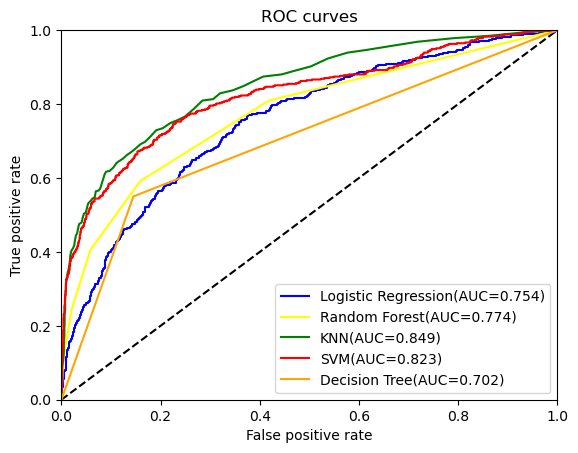

In [86]:
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1,tpr1,color='blue',label=f'Logistic Regression(AUC={roc_auc1:.3f})')
plt.plot(fpr2,tpr2,color='yellow',label=f'Random Forest(AUC={roc_auc2:.3f})')
plt.plot(fpr3,tpr3,color='green',label=f'KNN(AUC={roc_auc3:.3f})')
plt.plot(fpr4,tpr4,color='red',label=f'SVM(AUC={roc_auc4:.3f})')
plt.plot(fpr5,tpr5,color='orange',label=f'Decision Tree(AUC={roc_auc5:.3f})')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves')
plt.legend(loc='best')
plt.show()